In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

### The churn rate measures a company's loss in subscribers for a given period of time. 

In [3]:
df = pd.read_csv("telecommunications_churn.csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [4]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [6]:
# import dtale
# import pandas as pd
# d = dtale.show(df)
# d.open_browser()

## There is no null values

In [7]:
df['churn'].unique()

array([0, 1], dtype=int64)

In [8]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [9]:
df.shape

(3333, 19)

# Heatmap for null value

<AxesSubplot:>

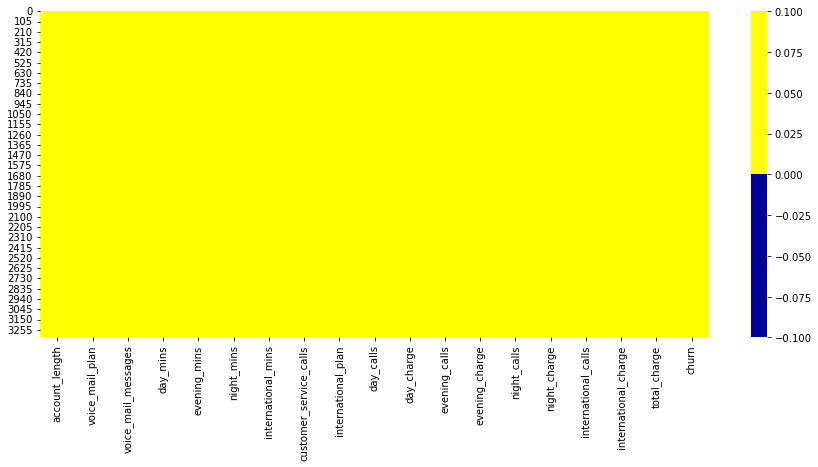

In [10]:
import seaborn as sns
plt.figure(figsize=(15,6))
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

### churn is the target variable. It is the one that determines whether the client is still in the company or not.


#### 0-No Churn or loyal customer (customer is still with the company)
#### 1-Churn (Customer left the company)

<AxesSubplot:>

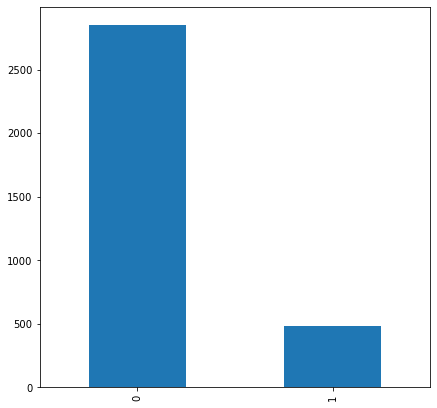

In [11]:
plt.figure(figsize=(7,7))

df["churn"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='churn'>

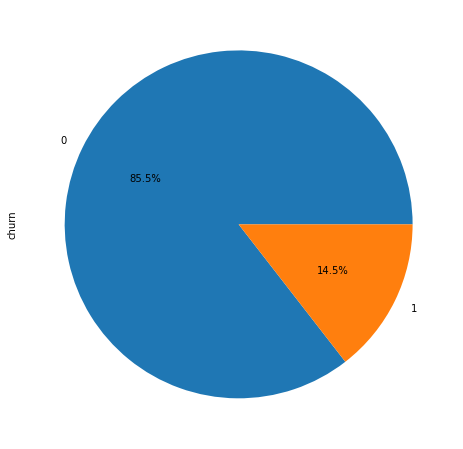

In [12]:
plt.figure(figsize=(10,8))
df["churn"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [13]:
#x=df.iloc[:,0:18]
#y=df['churn']

# Churn rate

In [14]:
cr=(df.shape[0]-df.churn.value_counts()[0])/df.shape[0]
print('Churn rate is {}%'.format(round(cr*100,2)))

Churn rate is 14.49%


#### 14.49% of the telecom customers left the company

# Calls

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'voice_mail_messages'}>,
        <AxesSubplot:title={'center':'day_mins'}>],
       [<AxesSubplot:title={'center':'evening_mins'}>,
        <AxesSubplot:title={'center':'night_mins'}>,
        <AxesSubplot:title={'center':'international_mins'}>,
        <AxesSubplot:title={'center':'customer_service_calls'}>],
       [<AxesSubplot:title={'center':'international_plan'}>,
        <AxesSubplot:title={'center':'day_calls'}>,
        <AxesSubplot:title={'center':'day_charge'}>,
        <AxesSubplot:title={'center':'evening_calls'}>],
       [<AxesSubplot:title={'center':'evening_charge'}>,
        <AxesSubplot:title={'center':'night_calls'}>,
        <AxesSubplot:title={'center':'night_charge'}>,
        <AxesSubplot:title={'center':'international_calls'}>],
       [<AxesSubplot:title={'center':'international_charge'}>,
        <AxesSubplot:

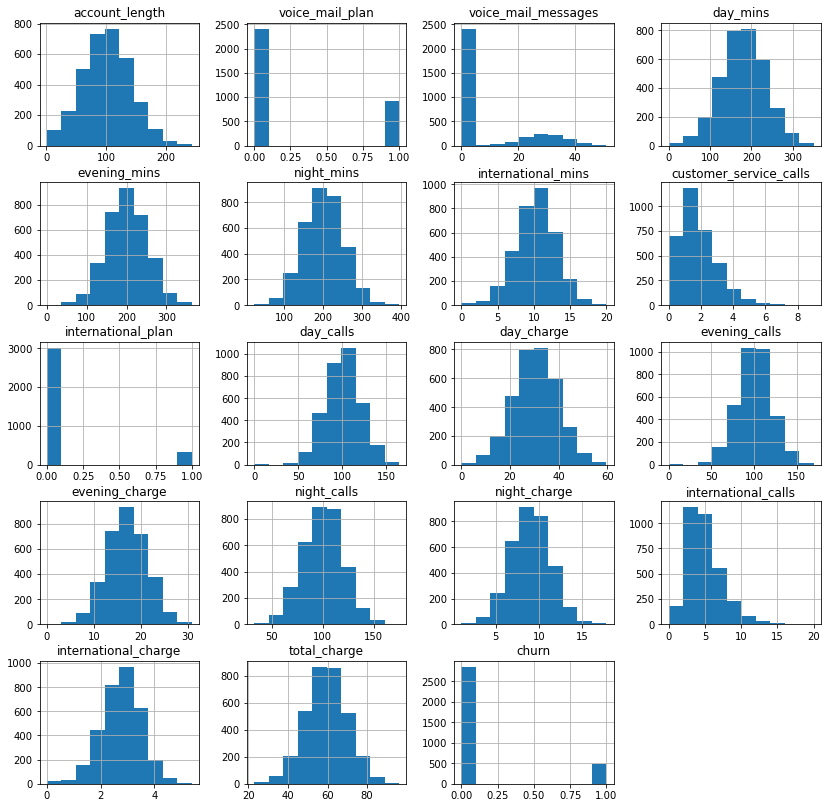

In [15]:
df.hist(figsize=(14,14))

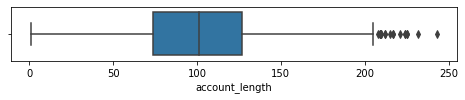

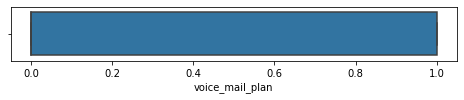

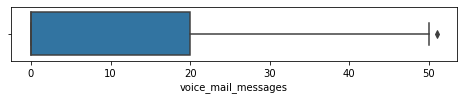

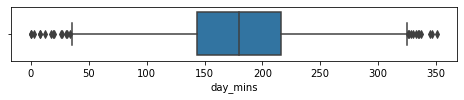

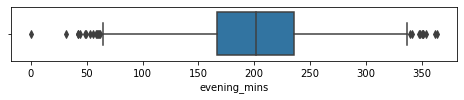

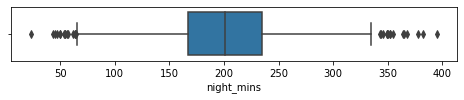

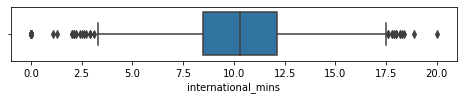

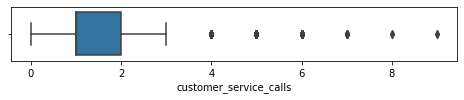

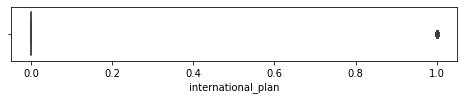

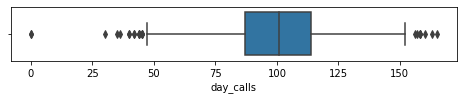

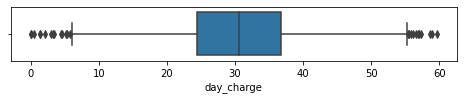

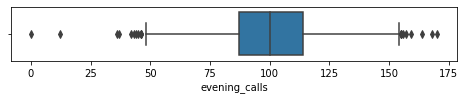

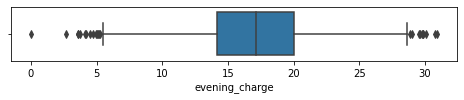

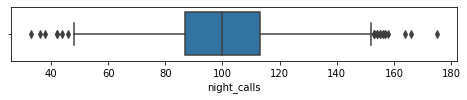

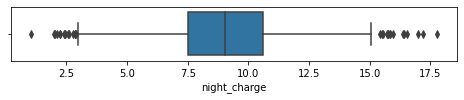

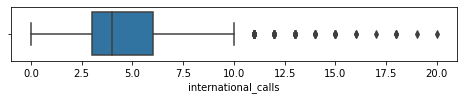

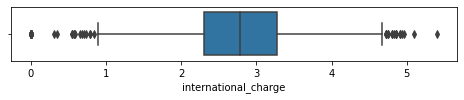

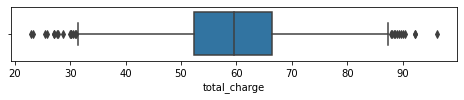

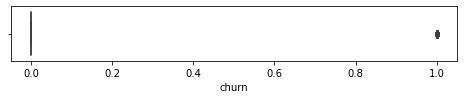

In [16]:
for column in df:
    plt.figure(figsize=(8,1))
    sns.boxplot(data=df, x=column)
plt.show()


In [17]:
Q1 = df['day_calls'].quantile(0.25)
Q3 = df['day_calls'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

#filter (df['day_calls'] >= Q1 - 1.5 * IQR) & (df['day_calls'] <= Q3 + 1.5 *IQR)
#df.loc[filter] 

In [18]:
df.day_calls[df.day_calls >= Q3 + (1.5 *IQR )]

315     158
468     163
1057    158
1121    165
1460    160
1869    156
2392    158
2394    157
Name: day_calls, dtype: int64

In [19]:
df.day_calls[df.day_calls<= Q1-(1.5*IQR)]


692     36
740     40
1144    30
1322    42
1345     0
1346    45
1397     0
1422    45
1989    35
2217    42
2492    45
2884    44
2885    44
2964    44
3187    40
Name: day_calls, dtype: int64

In [20]:
Q1 = df['evening_calls'].quantile(0.25)
Q3 = df['evening_calls'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
df.evening_calls[df.evening_calls >= (Q3 + (1.5 *IQR))]

58      164
301     168
1020    157
1071    155
1706    156
2227    155
3121    155
3157    159
3219    170
Name: evening_calls, dtype: int64

In [22]:
df.evening_calls[df.evening_calls <= (Q1 - (1.5 *IQR))]

154     46
475     42
646     37
960     12
1266    45
1615    36
1730    46
1856    44
2592    46
2853    43
2932     0
Name: evening_calls, dtype: int64

In [23]:
Q1 = df['night_calls'].quantile(0.25)
Q3 = df['night_calls'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
df.night_calls[df.night_calls >= (Q3 + (1.5 *IQR))]

332     152
429     153
493     175
586     154
901     158
1109    155
1200    157
1296    157
1748    154
1810    153
2001    152
2288    166
2728    155
2736    156
2982    152
3172    156
3211    164
3234    153
Name: night_calls, dtype: int64

In [25]:
df.night_calls[df.night_calls <= (Q1 - (1.5 *IQR))]

315     46
326     42
335     44
395     42
2659    33
2903    38
2988    36
3210    48
Name: night_calls, dtype: int64

In [26]:
Q1 = df['international_calls'].quantile(0.25)
Q3 = df['international_calls'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
df.international_calls[df.international_calls <= (Q1 - (1.5 *IQR))]

Series([], Name: international_calls, dtype: int64)

In [28]:
df.international_calls[df.international_calls >= (Q3 + (1.5 *IQR))]

22      19
41      15
153     11
182     12
185     13
        ..
3128    11
3206    13
3230    14
3291    20
3310    17
Name: international_calls, Length: 78, dtype: int64

# Minutes

In [29]:
Q1 = df['day_mins'].quantile(0.25)
Q3 = df['day_mins'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
df.day_mins[df.day_mins >= (Q3 + (1.5 *IQR))]

15      332.9
156     337.4
197     326.5
365     350.8
605     335.5
975     334.3
985     346.8
1679    329.8
2028    328.1
2412    326.3
2594    345.3
Name: day_mins, dtype: float64

In [31]:
df.day_mins[df.day_mins <= (Q1 - (1.5 *IQR))]

685     30.9
741     34.0
1052    12.5
1076    25.9
1345     0.0
1397     0.0
1621    19.5
1986     7.9
2124    27.0
2252    17.6
2736     2.6
2753     7.8
3046    18.9
3174    29.9
Name: day_mins, dtype: float64

In [32]:
Q1 = df['evening_mins'].quantile(0.25)
Q3 = df['evening_mins'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
df.evening_mins[df.evening_mins >= (Q3 + (1.5 *IQR))]

6       348.5
8       351.6
302     350.5
580     347.3
1601    350.9
2160    339.9
2331    361.8
2551    354.2
2732    363.7
3075    341.3
Name: evening_mins, dtype: float64

In [34]:
df.evening_mins[df.evening_mins <= (Q1 - (1.5 *IQR))]

3       61.9
32      31.2
533     42.2
587     58.9
821     43.9
850     52.9
889     42.5
893     60.8
1054    58.6
1190    56.0
1233    48.1
1335    60.0
1960    49.2
2932     0.0
Name: evening_mins, dtype: float64

In [35]:
Q1 = df['night_mins'].quantile(0.25)
Q3 = df['night_mins'].quantile(0.75)
IQR = Q3 - Q1

In [36]:
df.night_mins[df.night_mins >= (Q3 + (1.5 *IQR))]

244     354.9
444     349.2
862     345.8
918     342.8
922     364.3
1202    349.7
1238    352.5
1317    381.9
1445    377.5
2321    367.7
2609    344.3
2663    395.0
2754    350.2
3060    352.2
3107    364.9
Name: night_mins, dtype: float64

In [37]:
df.night_mins[df.night_mins <= (Q1 - (1.5 *IQR))]

116     57.5
883     45.0
992     63.3
999     54.5
1072    50.1
1113    43.7
1260    23.2
1313    63.6
2350    56.6
2382    54.0
2452    64.2
2756    50.1
3024    53.3
3159    61.4
3247    47.4
Name: night_mins, dtype: float64

In [38]:
Q1 = df['international_mins'].quantile(0.25)
Q3 = df['international_mins'].quantile(0.75)
IQR = Q3 - Q1

In [39]:
df.international_mins[df.international_mins >= (Q3 + (1.5 *IQR))]

115     20.0
214     17.6
314     18.9
367     18.0
502     17.5
515     17.5
535     18.2
1257    18.0
1420    17.9
1816    18.4
2004    17.8
2229    17.6
2371    18.2
2534    18.0
2816    18.3
3080    17.5
3307    17.8
Name: international_mins, dtype: float64

In [40]:
df.international_mins[df.international_mins <= (Q1 - (1.5 *IQR))]

179     0.0
225     2.7
343     0.0
397     2.0
488     0.0
595     0.0
712     0.0
762     1.3
878     0.0
1028    0.0
1080    0.0
1099    2.2
1400    0.0
1564    0.0
1966    2.0
2180    2.9
2197    3.1
2256    2.6
2345    0.0
2362    0.0
2513    0.0
2669    1.1
2733    0.0
2906    0.0
2918    0.0
2933    2.1
3022    2.9
3160    2.1
3216    2.4
3234    2.5
3275    0.0
3290    0.0
Name: international_mins, dtype: float64

# Charges

In [41]:
Q1 = df['international_charge'].quantile(0.25)
Q3 = df['international_charge'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
df.international_charge[df.international_charge >= (Q3 + (1.5 *IQR))]

115     5.40
214     4.75
314     5.10
367     4.86
502     4.73
515     4.73
535     4.91
1257    4.86
1420    4.83
1816    4.97
2004    4.81
2229    4.75
2371    4.91
2534    4.86
2816    4.94
3080    4.73
3307    4.81
Name: international_charge, dtype: float64

In [43]:
df.international_charge[df.international_charge <= (Q1 - (1.5 *IQR))]

179     0.00
225     0.73
343     0.00
397     0.54
488     0.00
595     0.00
712     0.00
762     0.35
878     0.00
1028    0.00
1080    0.00
1099    0.59
1400    0.00
1564    0.00
1966    0.54
2180    0.78
2197    0.84
2256    0.70
2345    0.00
2362    0.00
2513    0.00
2669    0.30
2733    0.00
2906    0.00
2918    0.00
2933    0.57
3022    0.78
3160    0.57
3216    0.65
3234    0.68
3275    0.00
3290    0.00
Name: international_charge, dtype: float64

In [44]:
Q1 = df['day_charge'].quantile(0.25)
Q3 = df['day_charge'].quantile(0.75)
IQR = Q3 - Q1

In [45]:
df.day_charge[df.day_charge >= (Q3 - (1.5 *IQR))]

0       45.07
1       27.47
2       41.38
3       50.90
4       28.34
        ...  
3328    26.55
3329    39.29
3330    30.74
3331    36.35
3332    39.85
Name: day_charge, Length: 3032, dtype: float64

In [46]:
df.day_charge[df.day_charge <= (Q1 - (1.5 *IQR))]

685     5.25
741     5.78
1052    2.13
1076    4.40
1345    0.00
1397    0.00
1621    3.32
1986    1.34
2124    4.59
2252    2.99
2736    0.44
2753    1.33
3046    3.21
3174    5.08
Name: day_charge, dtype: float64

In [47]:
Q1 = df['evening_charge'].quantile(0.25)
Q3 = df['evening_charge'].quantile(0.75)
IQR = Q3 - Q1

In [48]:
df.evening_charge[df.evening_charge >= (Q3 + (1.5 *IQR))]

6       29.62
8       29.89
302     29.79
580     29.52
1601    29.83
2160    28.89
2331    30.75
2551    30.11
2732    30.91
3075    29.01
Name: evening_charge, dtype: float64

In [49]:
df.evening_charge[df.evening_charge <= (Q1 - (1.5 *IQR))]

3       5.26
32      2.65
533     3.59
587     5.01
821     3.73
850     4.50
889     3.61
893     5.17
1054    4.98
1190    4.76
1233    4.09
1335    5.10
1960    4.18
2932    0.00
Name: evening_charge, dtype: float64

In [50]:
Q1 = df['night_charge'].quantile(0.25)
Q3 = df['night_charge'].quantile(0.75)
IQR = Q3 - Q1

In [51]:
df.night_charge[df.night_charge >= (Q3 + (1.5 *IQR))]

244     15.97
444     15.71
862     15.56
918     15.43
922     16.39
1202    15.74
1238    15.86
1317    17.19
1445    16.99
2321    16.55
2609    15.49
2663    17.77
2754    15.76
3060    15.85
3107    16.42
Name: night_charge, dtype: float64

In [52]:
df.night_charge[df.night_charge <= (Q1 - (1.5 *IQR))]

116     2.59
883     2.03
992     2.85
999     2.45
1072    2.25
1113    1.97
1260    1.04
1313    2.86
2350    2.55
2382    2.43
2452    2.89
2756    2.25
3024    2.40
3159    2.76
3247    2.13
Name: night_charge, dtype: float64

In [53]:
Q1 = df['total_charge'].quantile(0.25)
Q3 = df['total_charge'].quantile(0.75)
IQR = Q3 - Q1

In [54]:
df.total_charge[df.total_charge >= (Q3 + (1.5 *IQR))]

15      92.29
156     87.89
289     89.31
365     92.20
605     90.46
914     88.13
985     96.15
1679    88.66
2594    88.97
2629    90.12
3205    89.76
3322    88.39
Name: total_charge, dtype: float64

In [55]:
df.total_charge[df.total_charge <= (Q1 - (1.5 *IQR))]

77      27.02
181     31.05
523     30.04
648     27.54
1345    22.93
1397    25.87
1538    30.83
1621    25.52
1986    23.25
2241    30.18
2252    28.73
2707    30.48
2753    27.77
2859    27.08
2996    30.21
Name: total_charge, dtype: float64

In [56]:
Q1 = df['account_length'].quantile(0.25)
Q3 = df['account_length'].quantile(0.75)
IQR = Q3 - Q1

In [57]:
df.account_length[df.account_length >= (Q3 + (1.5 *IQR))]

197     208
238     215
309     209
416     224
817     243
1045    217
1093    210
1387    212
1408    232
1551    225
1751    225
1886    224
2150    212
2259    210
2277    217
2700    209
3216    221
3227    209
Name: account_length, dtype: int64

In [58]:
df.account_length[df.account_length <= (Q1 - (1.5 *IQR))]

Series([], Name: account_length, dtype: int64)

In [59]:
Q1 = df['voice_mail_messages'].quantile(0.25)
Q3 = df['voice_mail_messages'].quantile(0.75)
IQR = Q3 - Q1

In [60]:
df.voice_mail_messages[df.voice_mail_messages >= (Q3 + (1.5 *IQR))]

845     51
2716    50
2887    50
Name: voice_mail_messages, dtype: int64

In [61]:
df.voice_mail_messages[df.voice_mail_messages <= (Q1 - (1.5 *IQR))]

Series([], Name: voice_mail_messages, dtype: int64)

In [62]:
Q1 = df['customer_service_calls'].quantile(0.25)
Q3 = df['customer_service_calls'].quantile(0.75)
IQR = Q3 - Q1

In [63]:
df.customer_service_calls[df.customer_service_calls >= (Q3 + (1.5 *IQR))]

10      4
14      4
15      4
21      5
48      5
       ..
3307    4
3309    4
3320    4
3322    4
3323    5
Name: customer_service_calls, Length: 267, dtype: int64

In [64]:
df.customer_service_calls[df.customer_service_calls <= (Q1 - (1.5 *IQR))]

Series([], Name: customer_service_calls, dtype: int64)

<AxesSubplot:>

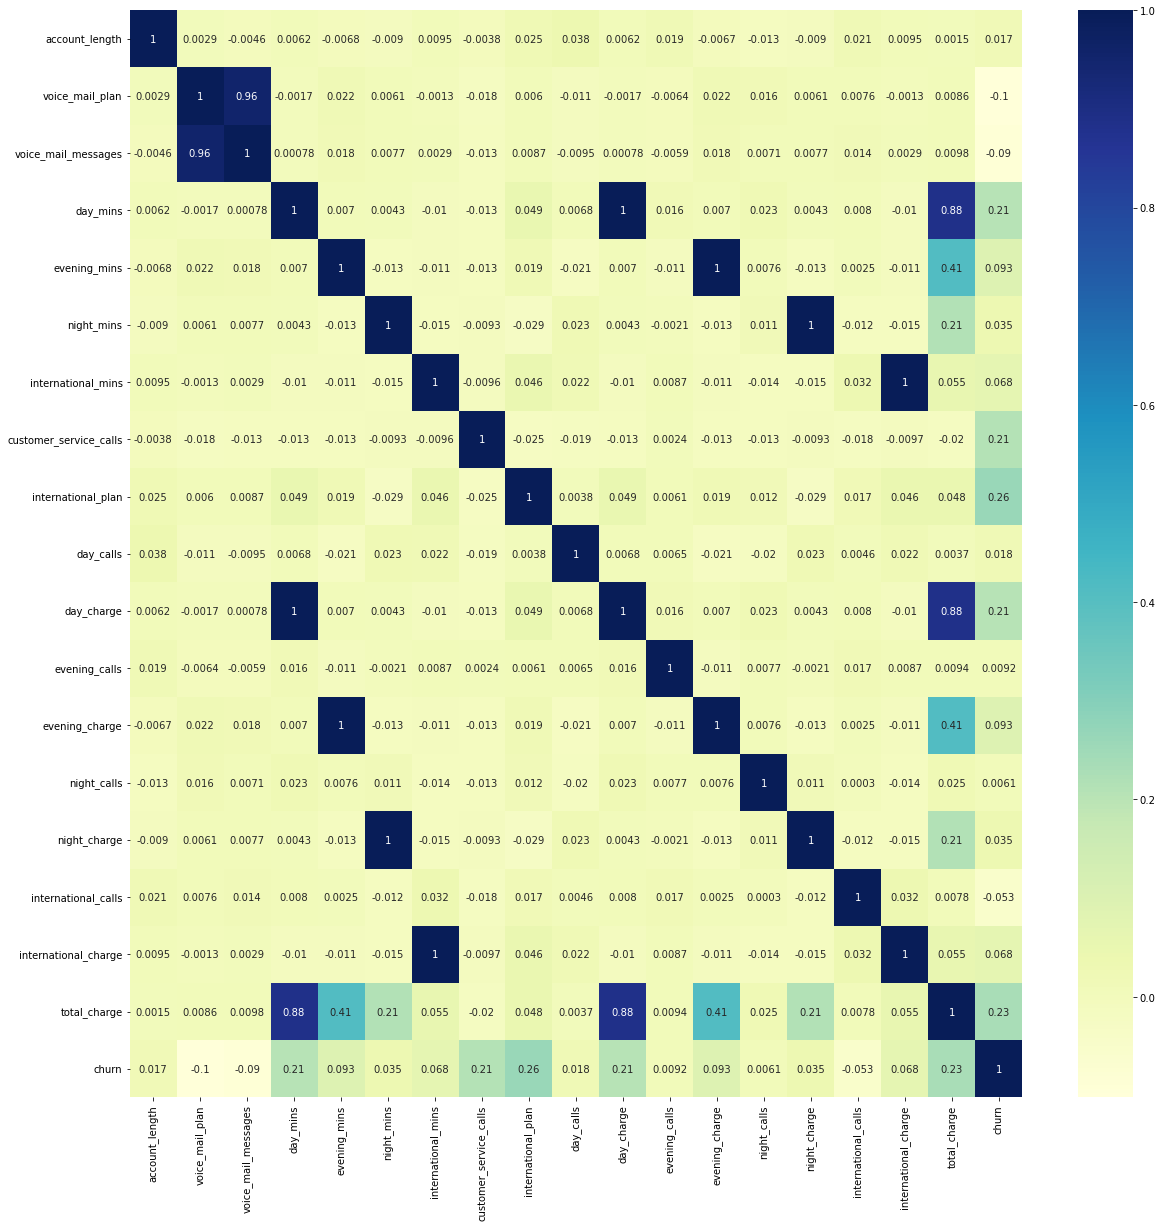

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

<AxesSubplot:>

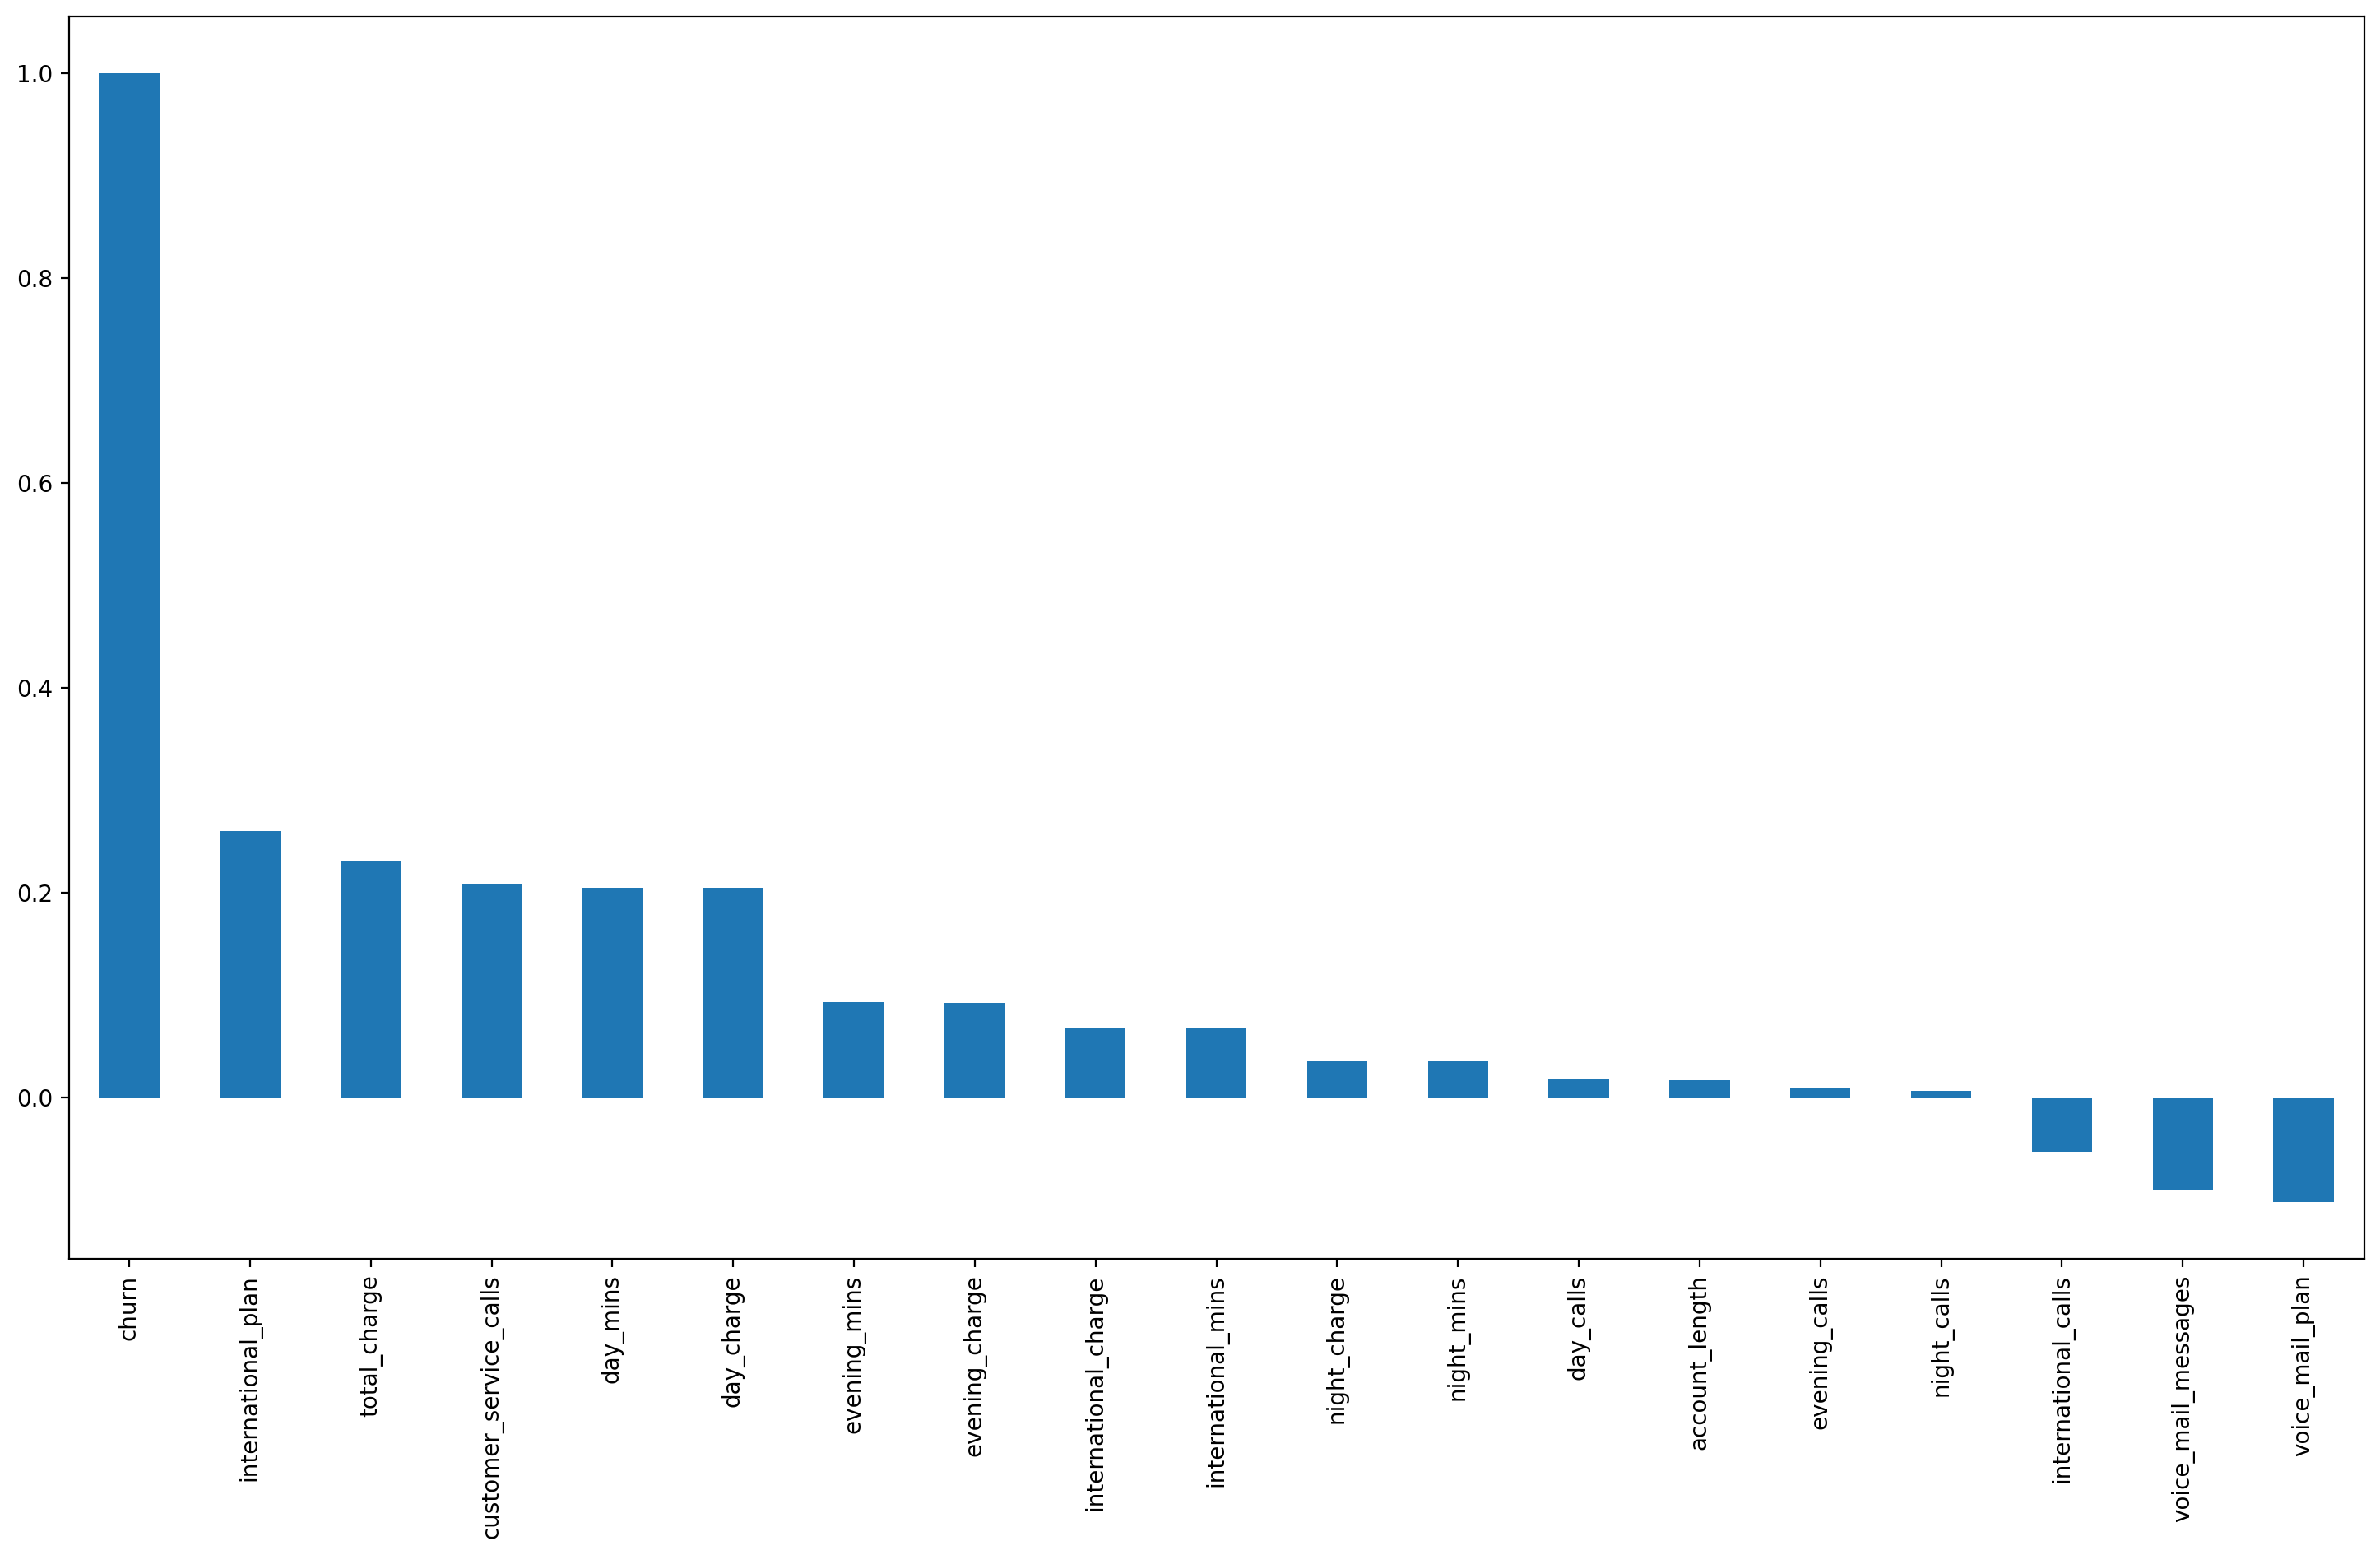

In [66]:
plt.figure(figsize=(18,10), dpi=200)
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [67]:
from sklearn.ensemble import IsolationForest

In [68]:
clf = IsolationForest(random_state=10,contamination=.01)

In [69]:
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [70]:
y_pred_outliers = clf.predict(df)

In [71]:
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
df['scores']=clf.decision_function(df)

In [73]:
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,scores
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,0.135961
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,0.136655
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,0.155450
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,-0.006286
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,0.118307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0,0.087604
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0,0.126628
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0,0.117966
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0,0.020191


In [74]:
df['anomaly']=clf.predict(df.iloc[:,0:19])

In [75]:
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,scores,anomaly
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,99,16.78,91,11.01,3,2.70,75.56,0,0.135961,1
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,16.62,103,11.45,3,3.70,59.24,0,0.136655,1
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,110,10.30,104,7.32,5,3.29,62.29,0,0.155450,1
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.006286,-1
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,122,12.61,121,8.41,3,2.73,52.09,0,0.118307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,126,18.32,83,12.56,6,2.67,60.10,0,0.087604,1
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,55,13.04,123,8.61,4,2.59,63.53,0,0.126628,1
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,58,24.55,91,8.64,6,3.81,67.74,0,0.117966,1
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,84,13.57,137,6.26,10,1.35,57.53,0,0.020191,1


In [76]:
len(df[df['anomaly']==-1])

34

In [77]:
df[df['anomaly']==-1]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,scores,anomaly
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.006286,-1
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,97,27.01,128,7.23,9,1.46,92.29,1,-0.028853,-1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,121,14.44,64,9.43,6,1.54,36.02,1,-0.000431,-1
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,...,107,17.33,78,5.50,15,3.94,56.20,1,-0.018784,-1
77,144,0,0,61.6,77.1,173.0,8.2,4,0,117,...,85,6.55,99,7.79,7,2.21,27.02,1,-0.002987,-1
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,...,122,21.67,126,6.22,6,5.40,66.75,1,-0.028080,-1
198,131,1,26,292.9,199.7,255.3,13.8,4,1,101,...,97,16.97,127,11.49,7,3.73,81.98,1,-0.012582,-1
250,33,1,29,157.4,117.9,279.2,13.9,4,0,99,...,80,10.02,79,12.56,11,3.75,53.09,1,-0.003501,-1
343,98,1,21,64.6,176.1,244.8,0.0,2,0,98,...,86,14.97,84,11.02,0,0.00,36.97,0,-0.010257,-1
473,72,1,33,96.6,315.4,163.3,6.2,4,0,59,...,98,26.81,117,7.35,4,1.67,52.25,1,-0.000008,-1


In [78]:
X=df.iloc[:,0:18]
Y=df['churn']

In [79]:
X

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53


In [80]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [83]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train, Y_train)
RF.score(X_test, Y_test)
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RF, n_features_to_select=15)
model = rfe.fit(X_train, Y_train)

In [84]:
 model.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True])

In [85]:
features=pd.DataFrame(zip(X_train.columns, model.support_),columns=["feature", "weight"],).sort_values("weight",ascending=False).reset_index(drop=True)
features

,feature,weight
0,account_length,True
1,international_plan,True
2,international_charge,True
3,international_calls,True
4,evening_charge,True
5,day_charge,True
6,voice_mail_plan,True
7,day_calls,True
8,customer_service_calls,True
9,international_mins,True


In [86]:
X

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53


### By doing the feture selection we are removing evening_calls, night_calls & account_length

In [87]:
X2=df[['day_calls','international_plan','international_charge','international_calls','night_charge','evening_charge',
      'day_charge','voice_mail_plan','total_charge','customer_service_calls','international_mins',
      'night_mins','evening_mins','day_mins','voice_mail_messages']]

           
Y2=df['churn']

In [88]:
X2

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
0,110,0,2.70,3,11.01,16.78,45.07,1,75.56,1,10.0,244.7,197.4,265.1,25
1,123,0,3.70,3,11.45,16.62,27.47,1,59.24,1,13.7,254.4,195.5,161.6,26
2,114,0,3.29,5,7.32,10.30,41.38,0,62.29,0,12.2,162.6,121.2,243.4,0
3,71,1,1.78,7,8.86,5.26,50.90,0,66.80,2,6.6,196.9,61.9,299.4,0
4,113,1,2.73,3,8.41,12.61,28.34,0,52.09,3,10.1,186.9,148.3,166.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,77,0,2.67,6,12.56,18.32,26.55,1,60.10,2,9.9,279.1,215.5,156.2,36
3329,57,0,2.59,4,8.61,13.04,39.29,0,63.53,3,9.6,191.3,153.4,231.1,0
3330,109,0,3.81,6,8.64,24.55,30.74,0,67.74,2,14.1,191.9,288.8,180.8,0
3331,105,1,1.35,10,6.26,13.57,36.35,0,57.53,2,5.0,139.2,159.6,213.8,0


In [89]:
Y2

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [90]:
df4=df[['day_calls','international_plan','international_charge','international_calls','night_charge','evening_charge',
      'day_charge','voice_mail_plan','total_charge','customer_service_calls','international_mins',
      'night_mins','evening_mins','day_mins','voice_mail_messages']]

### df4 is our final data set for model building

In [91]:
df4.columns

Index(['day_calls', 'international_plan', 'international_charge',
       'international_calls', 'night_charge', 'evening_charge', 'day_charge',
       'voice_mail_plan', 'total_charge', 'customer_service_calls',
       'international_mins', 'night_mins', 'evening_mins', 'day_mins',
       'voice_mail_messages'],
      dtype='object')

In [92]:
df4.describe()

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.435644,0.096910,2.764581,4.479448,9.039325,17.083540,30.562307,0.276628,59.449754,1.562856,10.237294,200.872037,200.980348,179.775098,8.099010
std,20.069084,0.295879,0.753773,2.461214,2.275873,4.310668,9.259435,0.447398,10.502261,1.315491,2.791840,50.573847,50.713844,54.467389,13.688365
min,0.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,22.930000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000
25%,87.000000,0.000000,2.300000,3.000000,7.520000,14.160000,24.430000,0.000000,52.380000,1.000000,8.500000,167.000000,166.600000,143.700000,0.000000
50%,101.000000,0.000000,2.780000,4.000000,9.050000,17.120000,30.500000,0.000000,59.470000,1.000000,10.300000,201.200000,201.400000,179.400000,0.000000
75%,114.000000,0.000000,3.270000,6.000000,10.590000,20.000000,36.790000,1.000000,66.480000,2.000000,12.100000,235.300000,235.300000,216.400000,20.000000
max,165.000000,1.000000,5.400000,20.000000,17.770000,30.910000,59.640000,1.000000,96.150000,9.000000,20.000000,395.000000,363.700000,350.800000,51.000000


Training-set accuracy score: 0.844
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1987
           1       0.37      0.07      0.12       346

    accuracy                           0.84      2333
   macro avg       0.61      0.52      0.52      2333
weighted avg       0.79      0.84      0.80      2333

Testing-set accuracy score: 0.863
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       863
           1       0.50      0.05      0.09       137

    accuracy                           0.86      1000
   macro avg       0.68      0.52      0.51      1000
weighted avg       0.82      0.86      0.81      1000



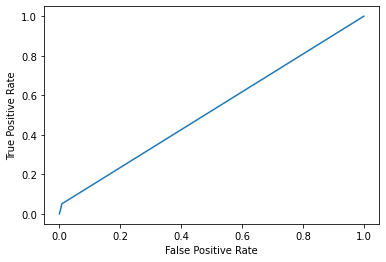

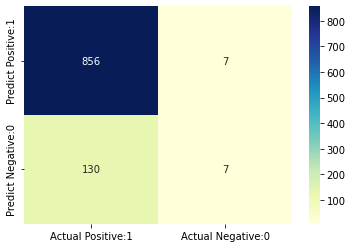

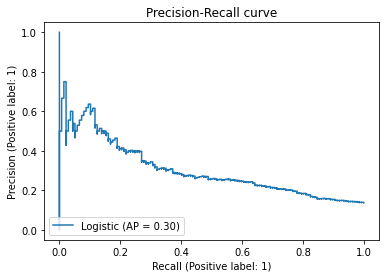

In [93]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_train = classifier.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.metrics import PrecisionRecallDisplay


# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, Y_test, name="Logistic"
)
_ = display.ax_.set_title("Precision-Recall curve")


# model accuracy using feature selection and using oversampling

Training-set accuracy score: 0.669
              precision    recall  f1-score   support

           0       0.68      0.63      0.66      2286
           1       0.66      0.71      0.68      2274

    accuracy                           0.67      4560
   macro avg       0.67      0.67      0.67      4560
weighted avg       0.67      0.67      0.67      4560

Testing-set accuracy score: 0.671
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       564
           1       0.66      0.73      0.69       576

    accuracy                           0.67      1140
   macro avg       0.67      0.67      0.67      1140
weighted avg       0.67      0.67      0.67      1140



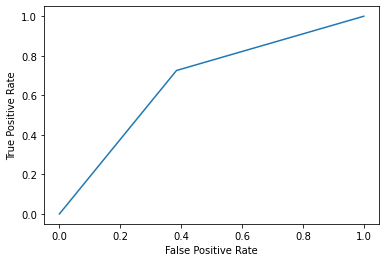

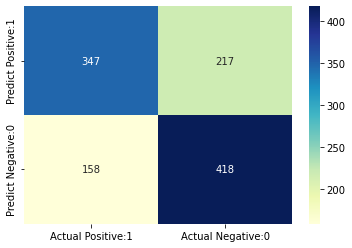

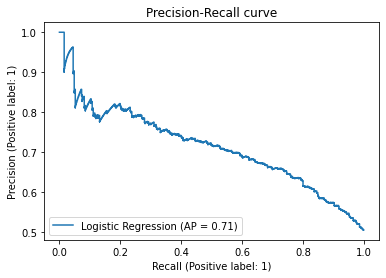

In [94]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#X,Y=df4.iloc[:,:-1],df4.iloc[:,-1]
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.2, random_state = 40)
classifier1 = LogisticRegression()
classifier1.fit(X_train,Y_train)
y_pred_train = classifier1.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier1.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier1, X_test, Y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("Precision-Recall curve")


Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990

Testing-set accuracy score: 0.929
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       818
           1       0.98      0.88      0.93       892

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



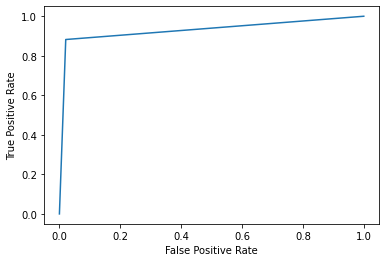

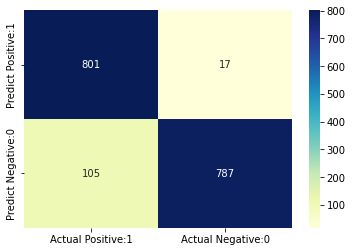

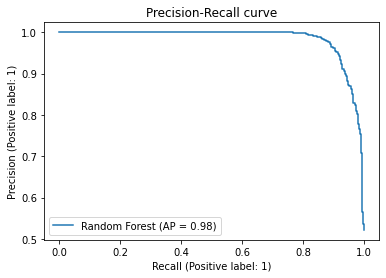

In [95]:
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier2 = RandomForestClassifier()
classifier2.fit(X_train,Y_train)
y_pred_train = classifier2.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier2.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier2, X_test, Y_test, name="Random Forest"
)
_ = display.ax_.set_title("Precision-Recall curve")


Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990

Testing-set accuracy score: 0.615
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       818
           1       1.00      0.26      0.41       892

    accuracy                           0.61      1710
   macro avg       0.78      0.63      0.56      1710
weighted avg       0.79      0.61      0.56      1710



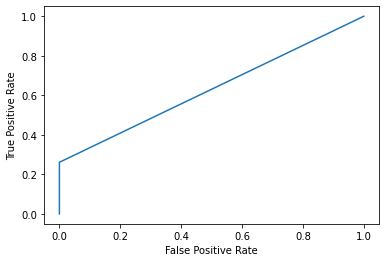

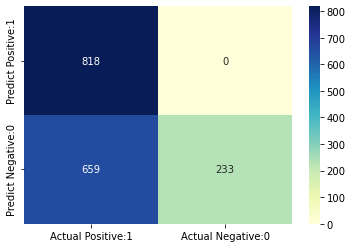

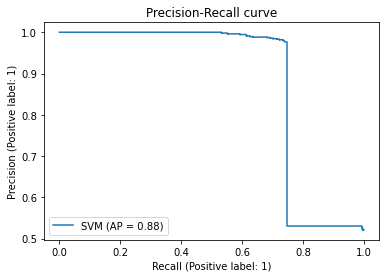

In [96]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier3 = SVC(C= 10, gamma = 0.5)
classifier3.fit(X_train,Y_train)
y_pred_train = classifier3.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier3.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier3, X_test, Y_test, name="SVM"
)
_ = display.ax_.set_title("Precision-Recall curve")


Training-set accuracy score: 0.839
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2032
           1       0.87      0.79      0.83      1958

    accuracy                           0.84      3990
   macro avg       0.84      0.84      0.84      3990
weighted avg       0.84      0.84      0.84      3990

Testing-set accuracy score: 0.816
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       818
           1       0.87      0.76      0.81       892

    accuracy                           0.82      1710
   macro avg       0.82      0.82      0.82      1710
weighted avg       0.82      0.82      0.82      1710



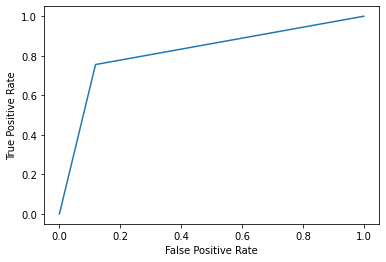

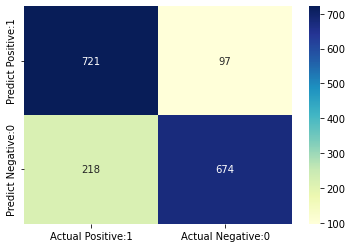

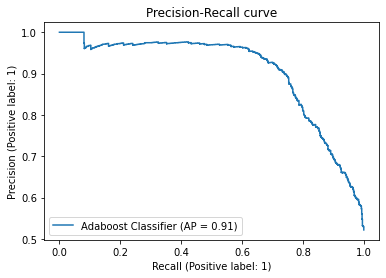

In [97]:
from sklearn.ensemble import AdaBoostClassifier
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier4 = AdaBoostClassifier()
classifier4.fit(X_train,Y_train)
y_pred_train = classifier4.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier4.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier4, X_test, Y_test, name="Adaboost Classifier"
)
_ = display.ax_.set_title("Precision-Recall curve")


Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990

Testing-set accuracy score: 0.93
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       818
           1       0.96      0.90      0.93       892

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



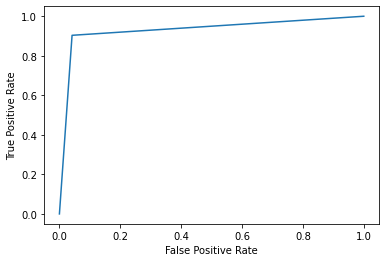

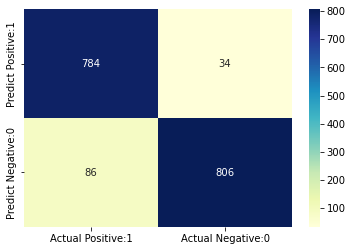

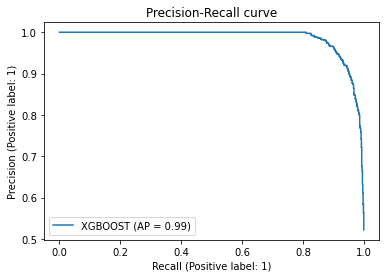

In [98]:
import xgboost as xgb
from xgboost import XGBClassifier
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier5 = XGBClassifier()
classifier5.fit(X_train,Y_train)

y_pred_train = classifier5.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier5.predict(X_test)
print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))


fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier5, X_test, Y_test, name="XGBOOST"
)
_ = display.ax_.set_title("Precision-Recall curve")


In [99]:
X_train

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
2735,104,1,3.590000,3,9.600000,16.050000,28.730000,1,57.970000,0,13.300000,213.300000,188.800000,169.000000,26
393,76,0,2.540000,3,8.360000,17.440000,36.910000,0,65.250000,2,9.400000,185.700000,205.200000,217.100000,0
4068,116,0,2.920305,4,7.637434,18.165367,22.294903,0,51.018009,3,10.808808,169.801938,213.721492,131.155549,0
5569,104,0,3.319791,4,9.801624,18.176348,52.812696,0,84.110458,2,12.282561,217.782412,213.796263,310.679572,0
2409,119,0,2.350000,2,8.120000,24.240000,14.710000,1,49.420000,2,8.700000,180.400000,285.200000,86.500000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,86,0,2.593108,1,9.691371,14.922388,49.094321,0,76.301188,0,9.586166,215.427417,175.574918,288.766708,0
3340,103,0,3.307189,4,7.740645,15.984869,21.121772,0,48.154475,4,12.259958,172.079318,188.054271,124.262470,0
5426,83,0,1.751748,2,7.840467,15.060115,26.623496,0,51.275826,3,6.497107,174.237822,177.210451,156.604696,0
3064,129,0,2.350000,2,9.450000,20.160000,46.210000,0,78.170000,4,8.700000,210.100000,237.200000,271.800000,0


In [100]:
Y_train

2735    1
393     0
4068    1
5569    1
2409    0
       ..
4722    1
3340    1
5426    1
3064    1
3398    1
Name: churn, Length: 3990, dtype: int64

In [101]:
X_test

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
2385,78,0,3.750000,2,10.840000,21.390000,36.480000,0,72.460000,0,13.900000,240.800000,251.700000,214.600000,0
3228,81,0,4.050000,6,7.440000,17.920000,39.460000,0,68.870000,5,15.000000,165.400000,210.800000,232.100000,0
2627,85,0,3.380000,1,11.120000,25.150000,25.640000,0,65.290000,1,12.500000,247.200000,295.900000,150.800000,0
4932,139,0,1.502277,5,12.619525,19.754002,42.735029,0,76.610833,2,5.573450,280.420638,232.430424,251.374517,0
3601,81,0,2.871076,4,11.619971,15.782344,32.122816,0,62.396207,2,10.639558,258.244670,185.713318,188.978476,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,105,0,0.890000,5,4.540000,15.450000,44.490000,0,65.370000,0,3.300000,100.900000,181.800000,261.700000,0
4009,104,0,3.020829,2,8.381711,13.779519,23.146818,1,48.328877,3,11.175133,186.203743,162.134224,136.181285,20
3118,100,0,1.400000,5,11.400000,16.490000,30.110000,1,59.400000,1,5.200000,253.400000,194.000000,177.100000,33
4721,111,1,3.015966,2,8.194113,14.264113,30.199505,0,55.673698,2,11.173083,182.141134,167.841134,177.665256,0


In [102]:
Y_test

2385    0
3228    0
2627    0
4932    1
3601    1
       ..
2198    0
4009    1
3118    0
4721    1
4186    1
Name: churn, Length: 1710, dtype: int64

Training-set accuracy score: 0.602
              precision    recall  f1-score   support

           0       0.63      0.52      0.57      2032
           1       0.58      0.69      0.63      1958

    accuracy                           0.60      3990
   macro avg       0.61      0.60      0.60      3990
weighted avg       0.61      0.60      0.60      3990

Testing-set accuracy score: 0.587
              precision    recall  f1-score   support

           0       0.58      0.52      0.54       818
           1       0.59      0.65      0.62       892

    accuracy                           0.59      1710
   macro avg       0.59      0.58      0.58      1710
weighted avg       0.59      0.59      0.58      1710



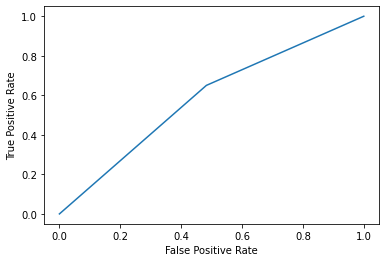

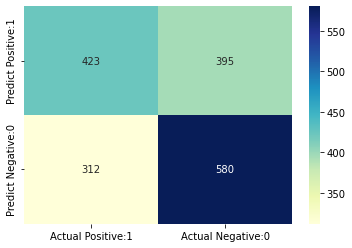

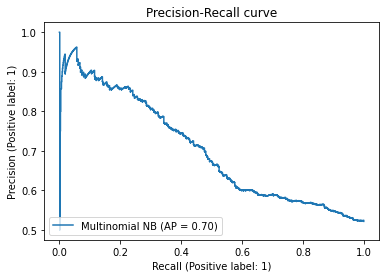

In [103]:
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier6 = MultinomialNB()
classifier6.fit(X_train,Y_train)
y_pred_train = classifier6.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier6.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier6, X_test, Y_test, name="Multinomial NB"
)
_ = display.ax_.set_title("Precision-Recall curve")



Training-set accuracy score: 0.73
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      2032
           1       0.71      0.77      0.74      1958

    accuracy                           0.73      3990
   macro avg       0.73      0.73      0.73      3990
weighted avg       0.73      0.73      0.73      3990

Testing-set accuracy score: 0.726
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       818
           1       0.72      0.77      0.74       892

    accuracy                           0.73      1710
   macro avg       0.73      0.72      0.72      1710
weighted avg       0.73      0.73      0.73      1710



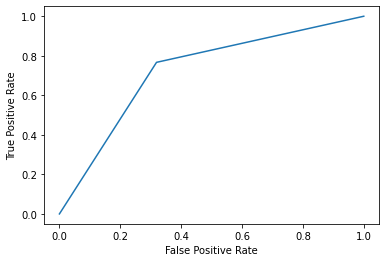

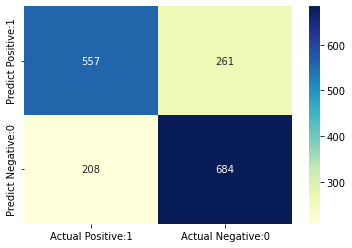

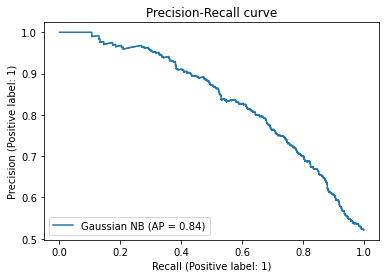

In [104]:
from sklearn.naive_bayes import GaussianNB
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier7 = GaussianNB()
classifier7.fit(X_train,Y_train)
y_pred_train = classifier7.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier7.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier7, X_test, Y_test, name="Gaussian NB"
)
_ = display.ax_.set_title("Precision-Recall curve")



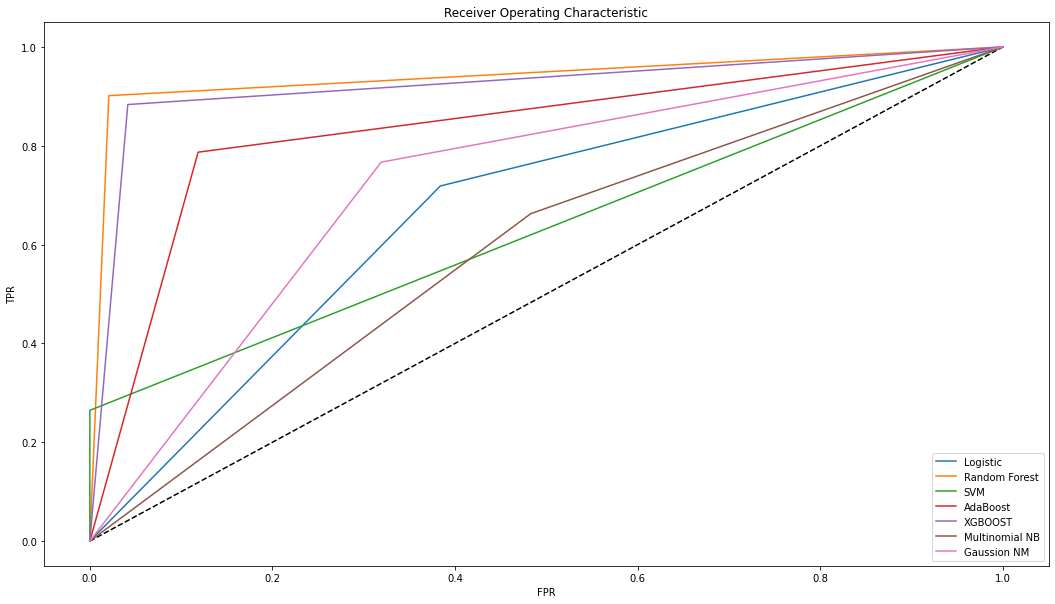

In [105]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(18,10))
y_pred1 = classifier1.predict(X_test)
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred1)

y_pred2 = classifier2.predict(X_test)
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred2)


y_pred3 = classifier3.predict(X_test)
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred3)

y_pred4 = classifier4.predict(X_test)
fpr4 , tpr4, thresholds4 = roc_curve(Y_test, y_pred4)

y_pred5 = classifier5.predict(X_test)
fpr5 , tpr5, thresholds5 = roc_curve(Y_test, y_pred5)

y_pred6 = classifier6.predict(X_test)
fpr6 , tpr6, thresholds6 = roc_curve(Y_test, y_pred6)

y_pred7 = classifier7.predict(X_test)
fpr7 , tpr7, thresholds7 = roc_curve(Y_test, y_pred7)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "SVM")
plt.plot(fpr4, tpr4, label= "AdaBoost")
plt.plot(fpr5, tpr5, label= "XGBOOST")
plt.plot(fpr6, tpr6, label= "Multinomial NB")
plt.plot(fpr7, tpr7, label= "Gaussion NM")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# We got the best accuracy in XG Boost and Random forest, we are considering Random forest as final model training 100% and testing 93.66% 

### SweetViz

In [106]:
import sweetviz as sv

In [107]:
sweet_report = sv.analyze(df4)
sweet_report.show_html('telecom_report1.html')

                                             |                                             | [  0%]   00:00 ->…

Report telecom_report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Deployment

In [108]:
#pip install streamlit

In [109]:
import pickle
pickle_out = open("churn1.pkl","wb")
pickle.dump(classifier2,pickle_out)                      # classifier 2 is random forest
pickle_out.close()

In [ ]:
!streamlit run churn_pred.py